In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mpl_toolkits.axes_grid1 as ag1
import utils

%matplotlib inline

In [2]:
sns.set_context('talk')
sns.set_style('dark')

In [3]:
ordering = np.load('ordering.npz')
print ordering['params']
print ordering['values']

sizes = [len(l) for l in ordering['values']]
print sizes

[[u'stimulus', u'input_factor'] [u'stimulus', u'jitter', u'peak']
 [u'connectivity', u'Wcc_factor']]
[[  0.    0.1   0.2   0.3   0.4   0.5   0.6   0.7   0.8   0.9   1. ]
 [  0.    5.   10.   15.   20.   25.   30.   35.   40.   45.   50. ]
 [  1.    1.1   1.2   1.3   1.4   1.5   1.6   1.7   1.8   1.9   2. ]]
[11, 11, 11]


In [19]:
# inds_init = [0, 200, 4000, 5000]
# data = np.zeros([4] + sizes)
# for i in xrange(sizes[0]):
#     for j in xrange(sizes[1]):
#         for k in xrange(sizes[2]):
#             results = np.load('result-{}-{}-{}.npz'.format(i, j, k))
            
#             diffs = results['spike_scores_post'] - results['spike_scores_pre']
#             ablated = results['ablated']
            
#             diffs = np.delete(diffs, ablated)
            
#             inds = utils.newInds(inds_init, ablated)
#             data[:3,i,j,k] = [np.mean(diffs[inds[l]:inds[l+1]]) for l in xrange(len(inds)-1)]
#             data[3,i,j,k] = np.mean(diffs[inds[0]:inds[2]])

In [20]:
#np.save('data.npy', data)

In [4]:
data = np.load('data.npy');

In [18]:
ch = 0

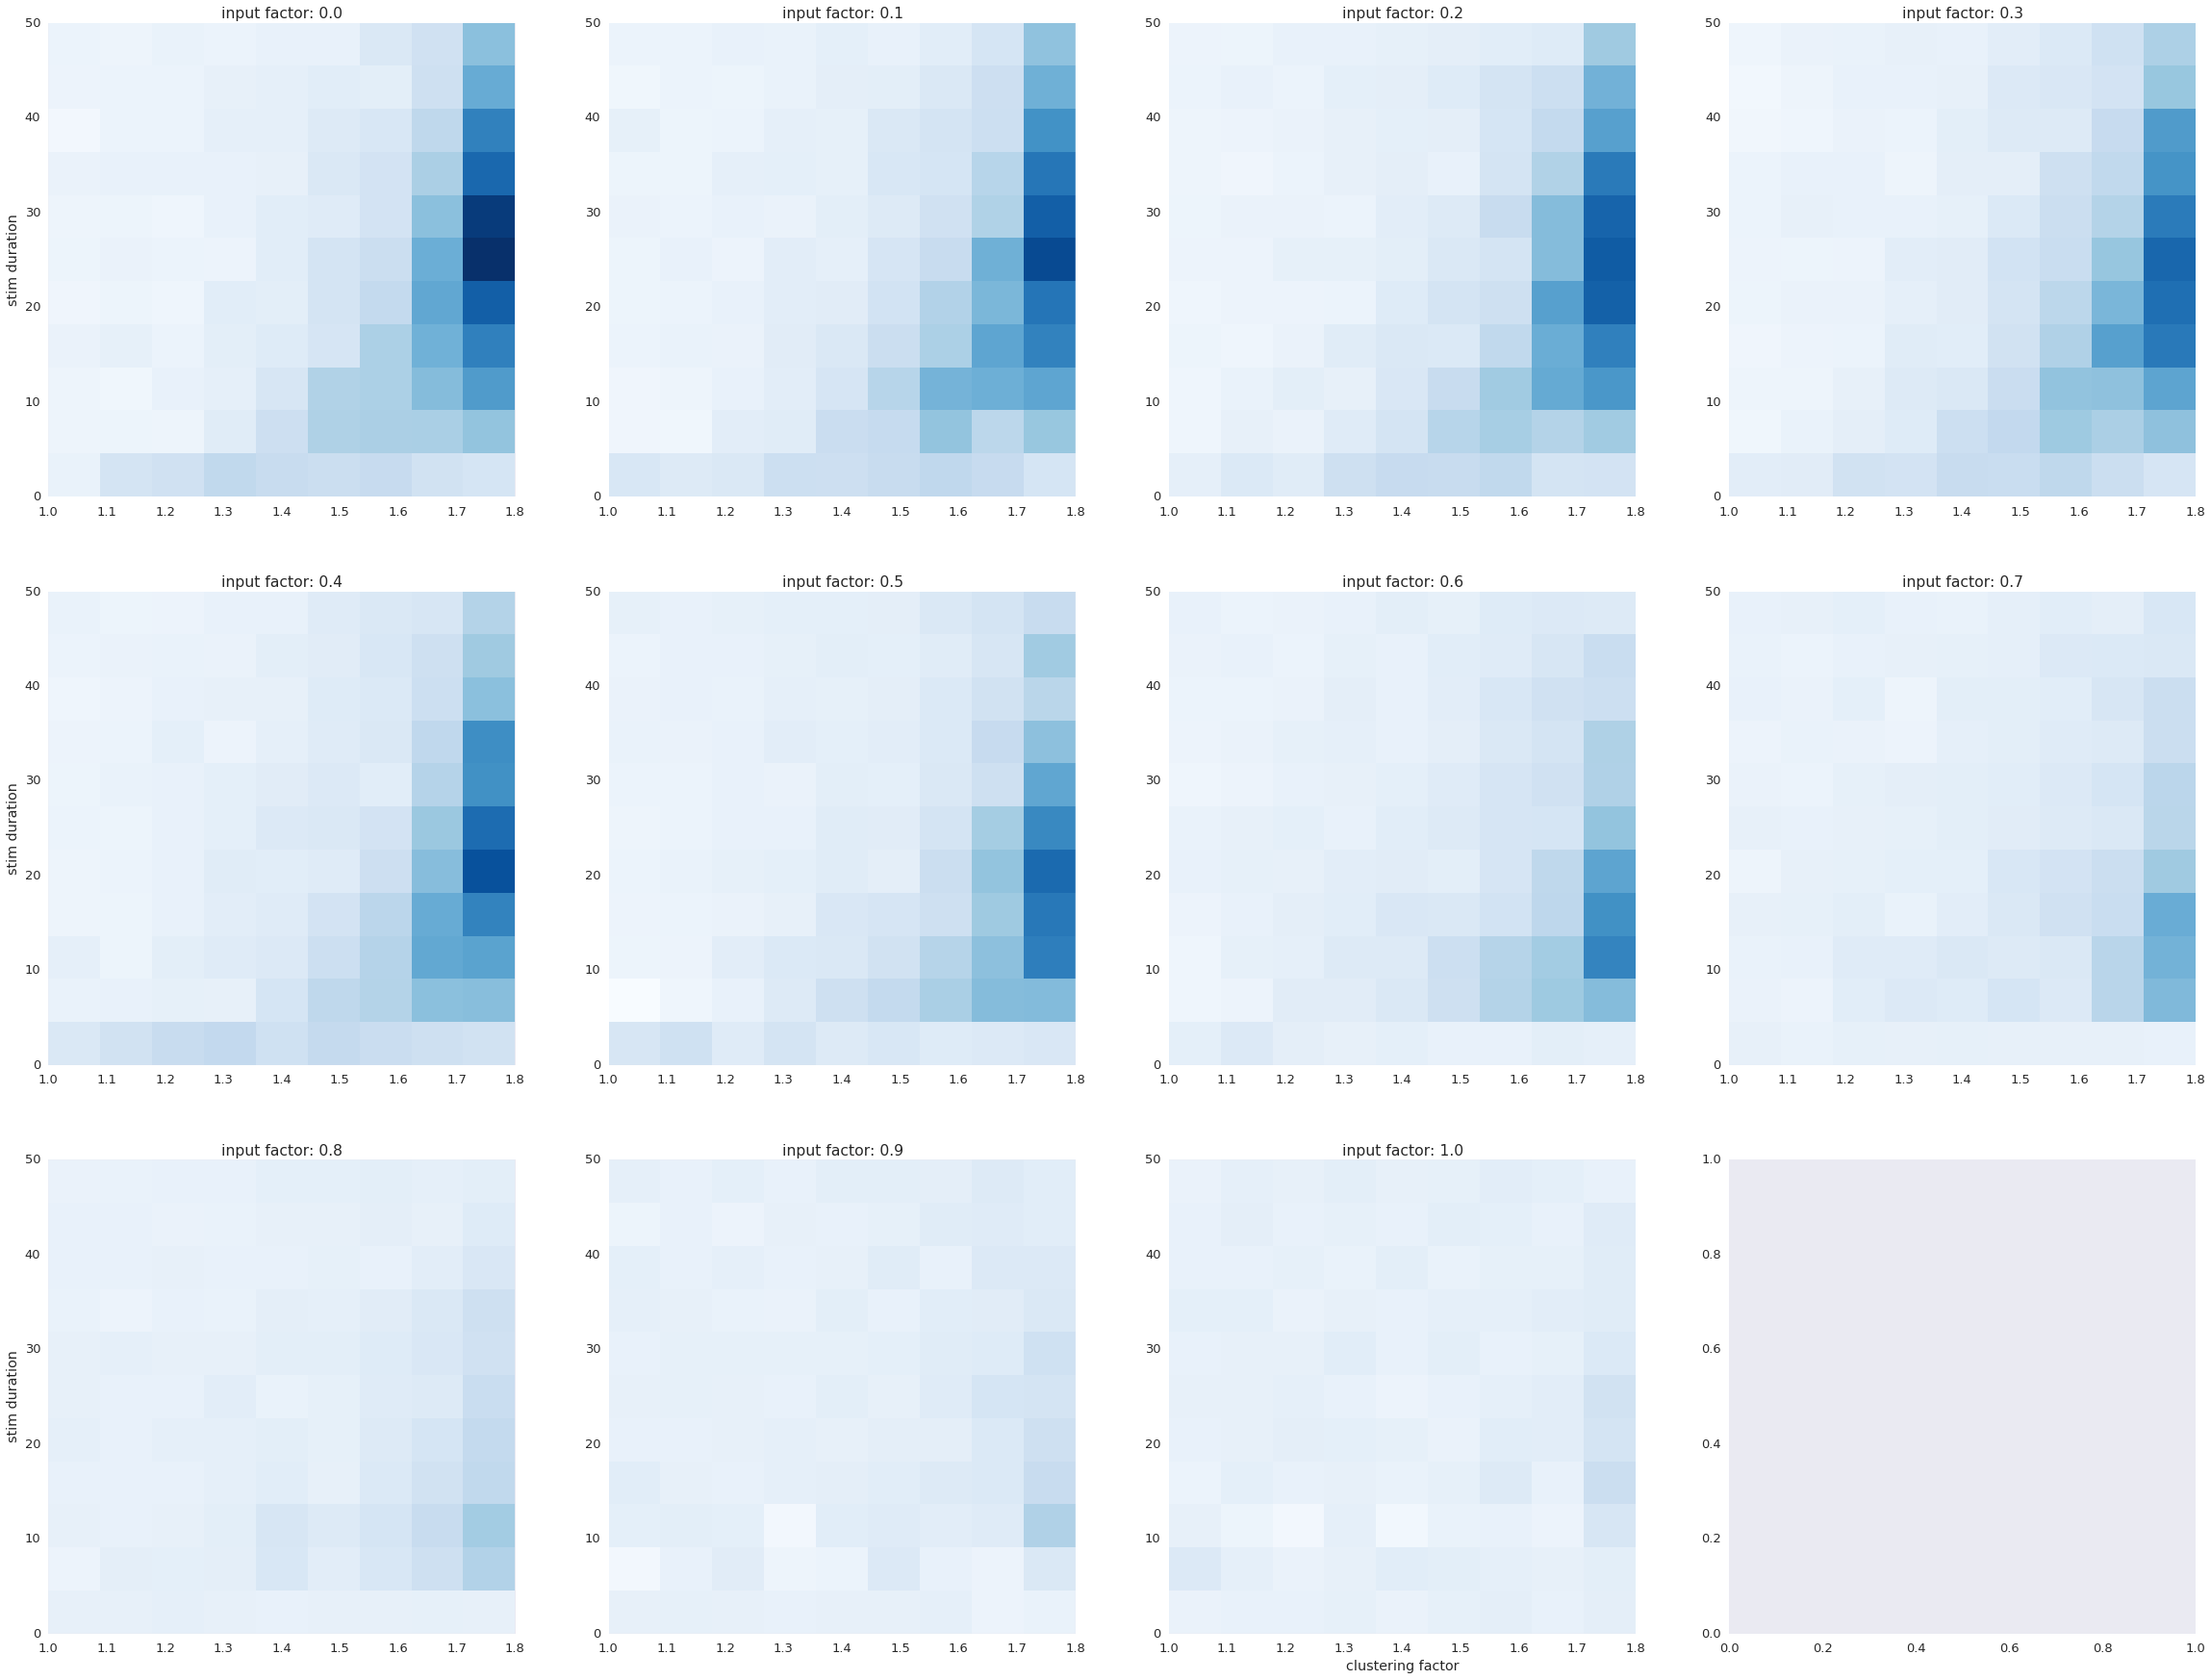

In [42]:
cmap = 'Blues_r'
cut_duration = 0
cut_cluster = sizes[2]-2
vmin, vmax = np.min(data[ch,:,cut_duration:,:cut_cluster]), np.max(data[ch,:,cut_duration:,:cut_cluster])
lims = [ordering['values'][2][0], ordering['values'][2][cut_cluster-1],
        ordering['values'][1][cut_duration], ordering['values'][1][-1]]

nrows, ncols = 3, 4
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(40,30))
axes = axes.flatten()[:-1]

for i in xrange(sizes[0]):
    dat = data[ch,i,cut_duration:,:cut_cluster]
    ax = axes[i]
    val = ordering['values'][0][i]
    ax.imshow(dat, origin='bottom', cmap=cmap, vmin=vmin, vmax=vmax,
              extent=lims, interpolation='none')
    ax.set_aspect('auto')
    ax.set_title('input factor: {}'.format(str(val)))

    if i > nrows*(ncols-1):
        ax.set_xlabel('clustering factor')
    if i % ncols == 0:
        ax.set_ylabel('stim duration')

plt.savefig('fig-2.png')
#plt.savefig('uniform-color.eps')

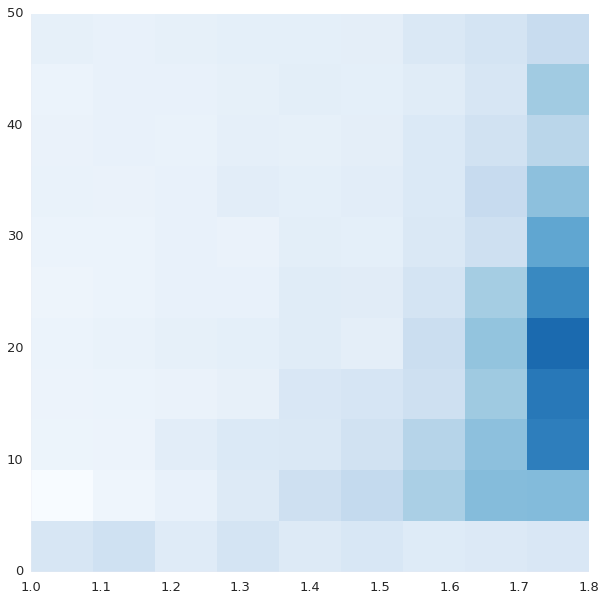

In [47]:
dat = data[ch,5,cut_duration:,:cut_cluster]
fig = plt.figure(figsize=(10,10))
ax = plt.gca()
val = ordering['values'][0][i]
ax.imshow(dat, origin='bottom', cmap=cmap, vmin=vmin, vmax=vmax,
          extent=lims, interpolation='none')
ax.set_aspect('auto')
#ax.set_title('input factor: {}'.format(str(val)))
plt.savefig('fig-0.png')

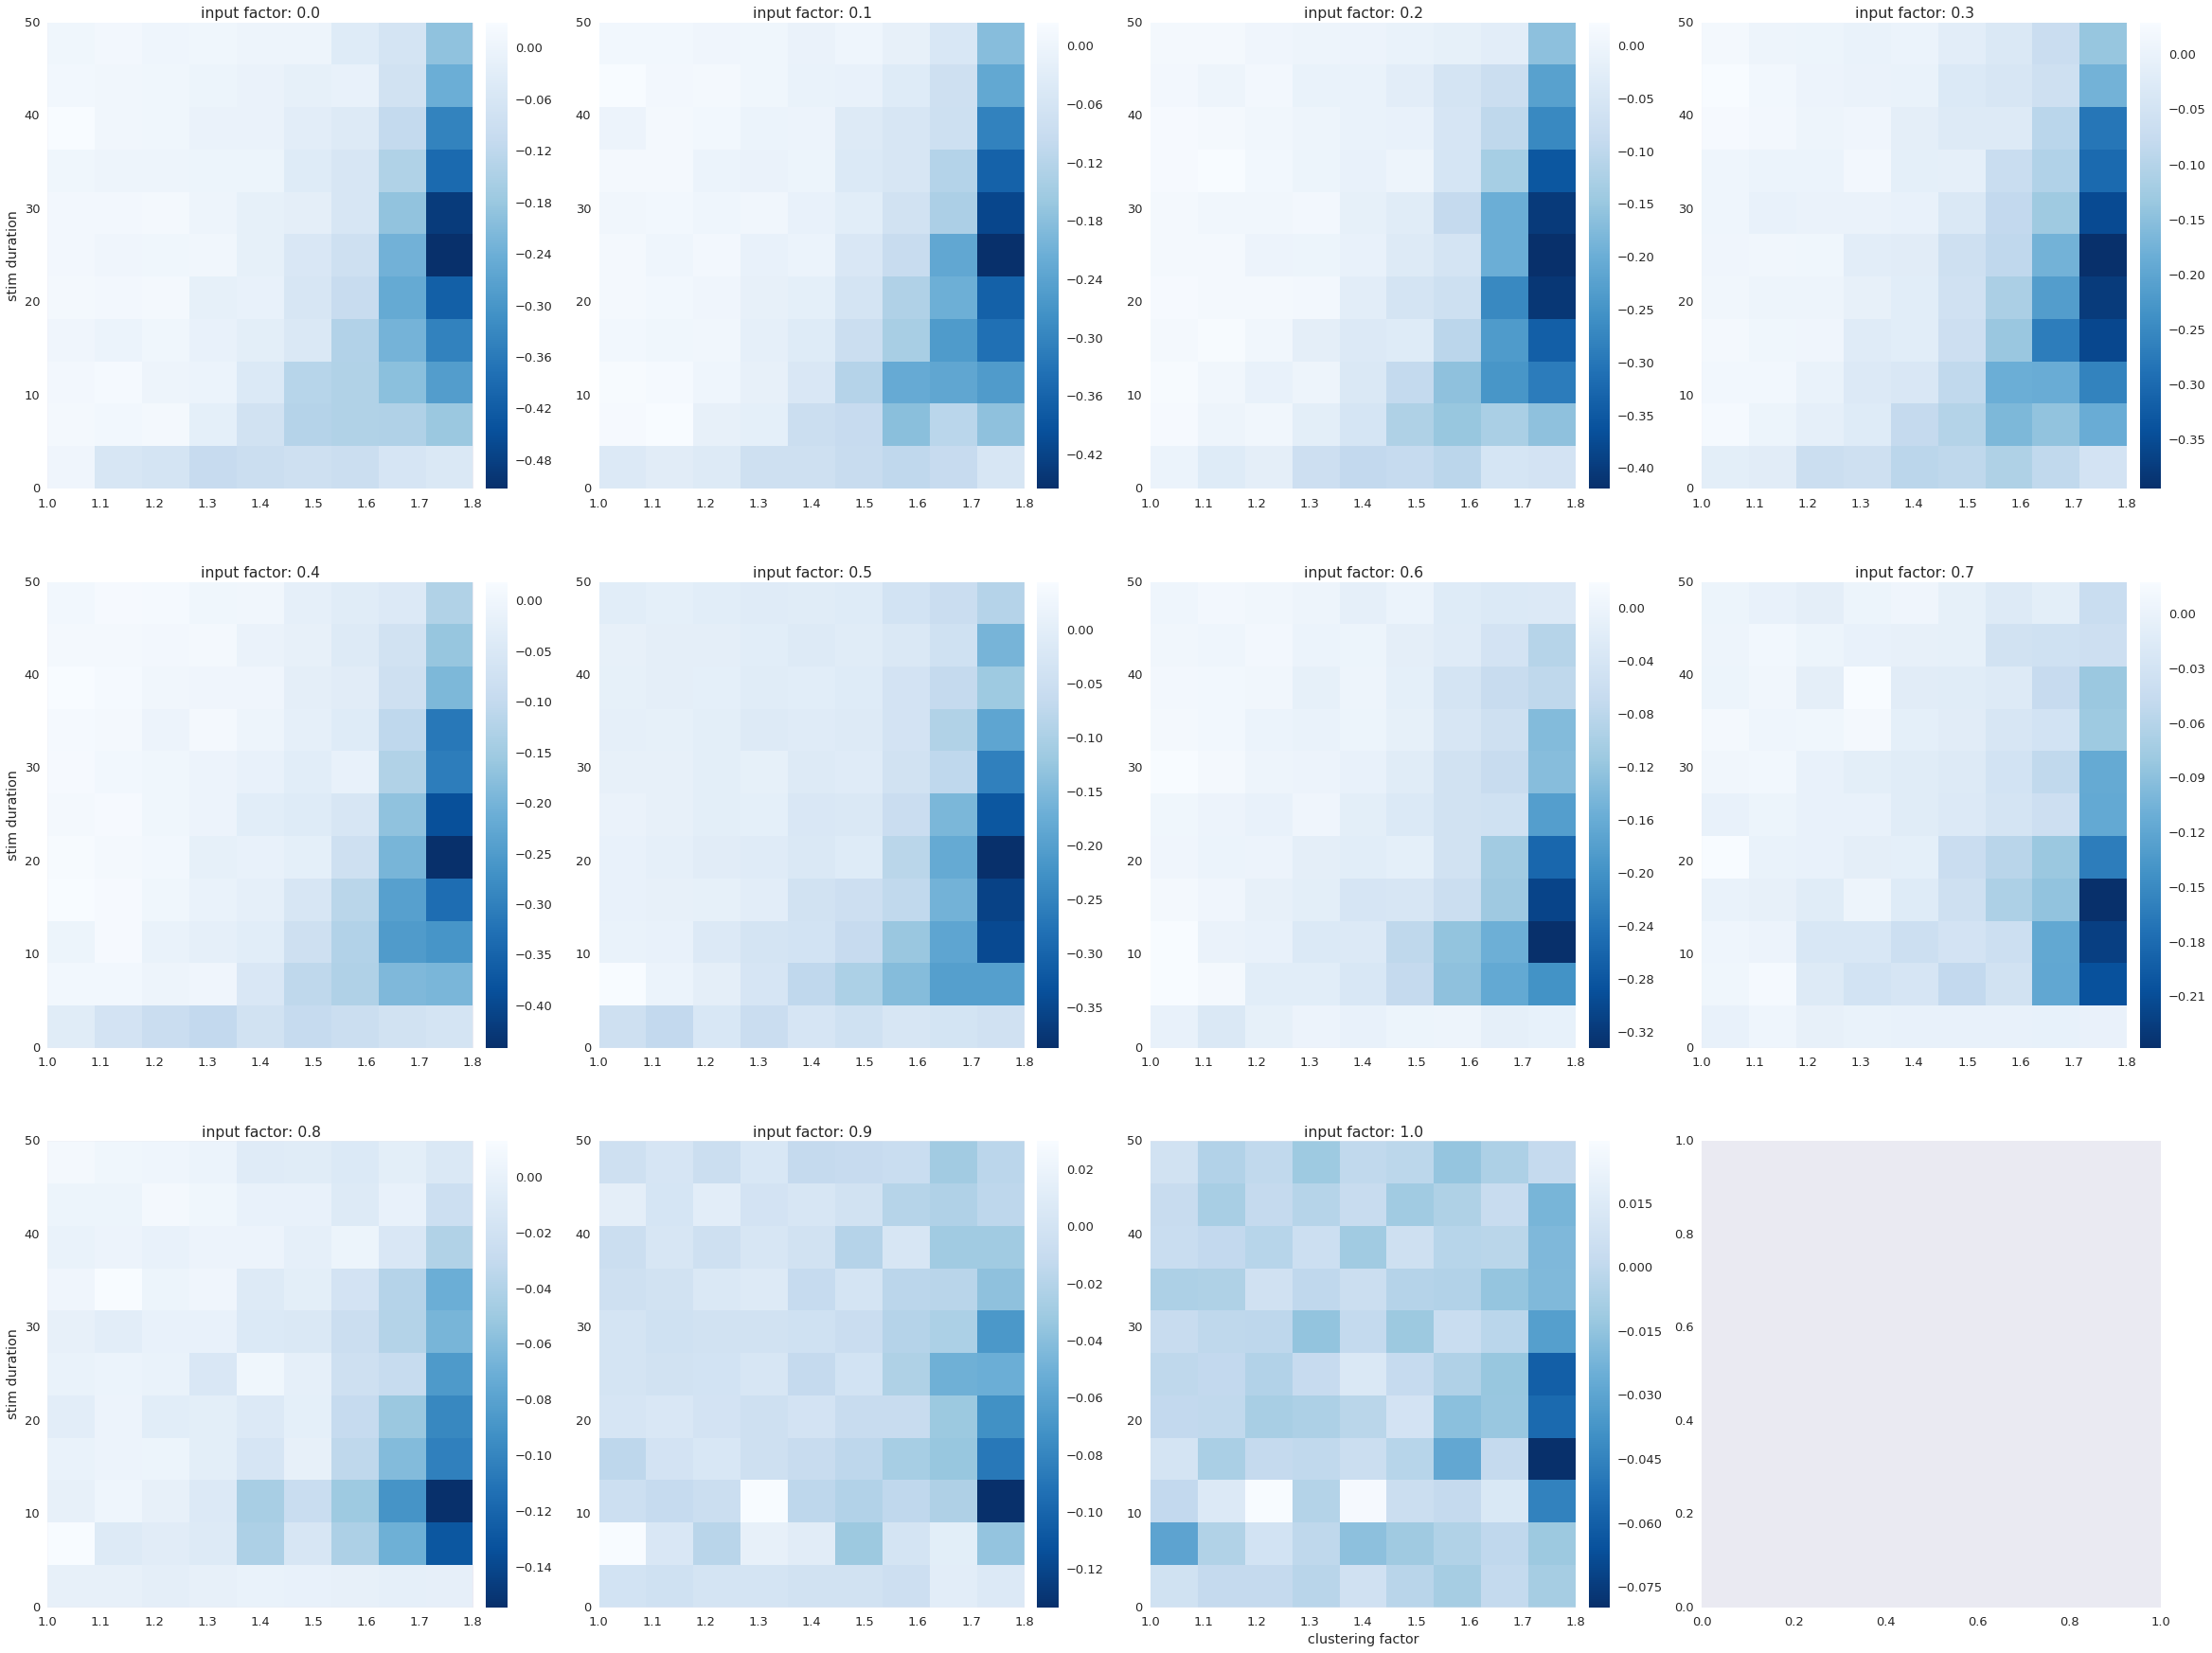

In [43]:
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(40,30))
axes = axes.flatten()[:-1]

for i in xrange(sizes[0]):
    dat = data[ch,i,cut_duration:,:cut_cluster]
    ax = axes[i]
    val = ordering['values'][0][i]
    im = ax.imshow(dat, origin='bottom', cmap=cmap,
                    extent=lims, interpolation='None')
    ax.set_aspect('auto')
    ax.set_title('input factor: {}'.format(str(val)))
    
    divider = ag1.make_axes_locatable(ax)
    cax = divider.append_axes("right", "5%", pad="3%")
    plt.colorbar(im, cax=cax)
    
    if i > nrows*(ncols-1):
        ax.set_xlabel('clustering factor')
    if i % ncols == 0:
        ax.set_ylabel('stim duration')
        
plt.savefig('fig-1.png', interpolation='none')
#plt.savefig('varied-color.eps')

In [221]:
for (v1, v2) in zip(params['params'], params['values']):
    print v1, v2
    print '-------------'

[u'stimulus', u'input_factor'] [ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1. ]
-------------
[u'stimulus', u'jitter', u'peak'] [  0.   5.  10.  15.  20.  25.  30.  35.  40.  45.  50.]
-------------
[u'connectivity', u'Wcc_factor'] [ 1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9  2. ]
-------------


In [58]:
sns.set_style('white')

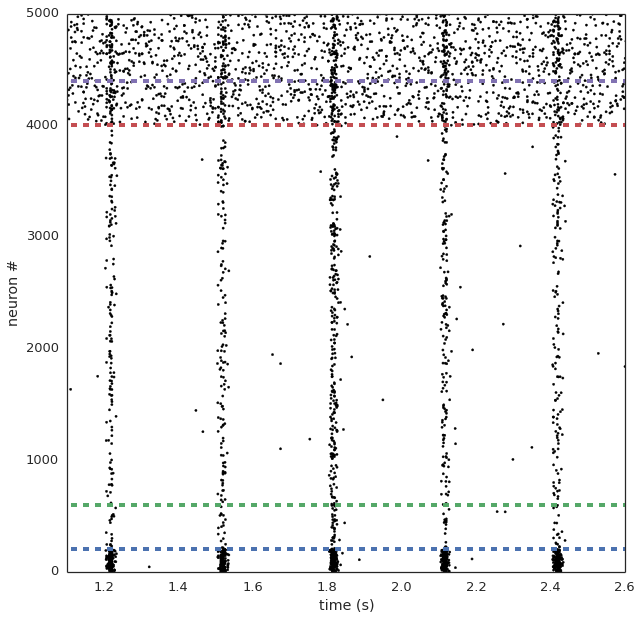

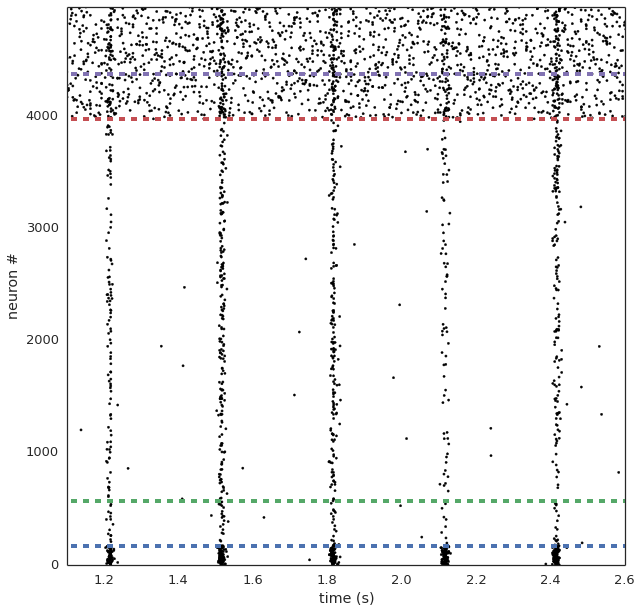

In [66]:
i, j, k = 5, 2, 7

results = np.load('result-{}-{}-{}.npz'.format(i,j,k))
times_pre, ids_pre = results['spike_times_pre'], results['spike_ids_pre']
times_post, ids_post = results['spike_times_post'], results['spike_ids_post']
ablated = results['ablated']

inds_pre = [0, 200, 600, 4000, 4400, 5000]
inds_post = utils.newInds(inds_pre, ablated)

xlims = [1.1, 2.6]

plt.figure(figsize=(10,10))
utils.plotSpikes(times_pre, ids_pre, lines=inds_pre[1:-1])
plt.xlim(xlims);
plt.savefig('raster-pre.eps')


plt.figure(figsize=(10,10))
utils.plotSpikes(times_post, ids_post, lines=inds_post[1:-1], ablated=ablated)
plt.xlim(xlims)
plt.savefig('raster-post.eps')

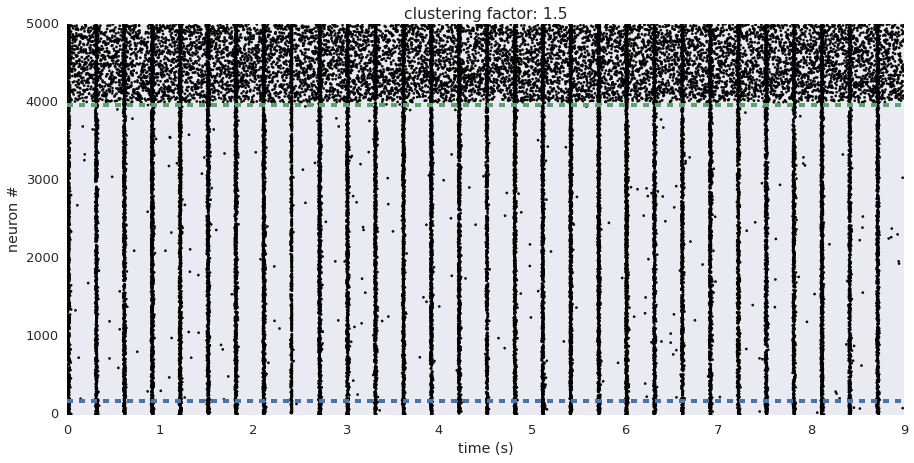

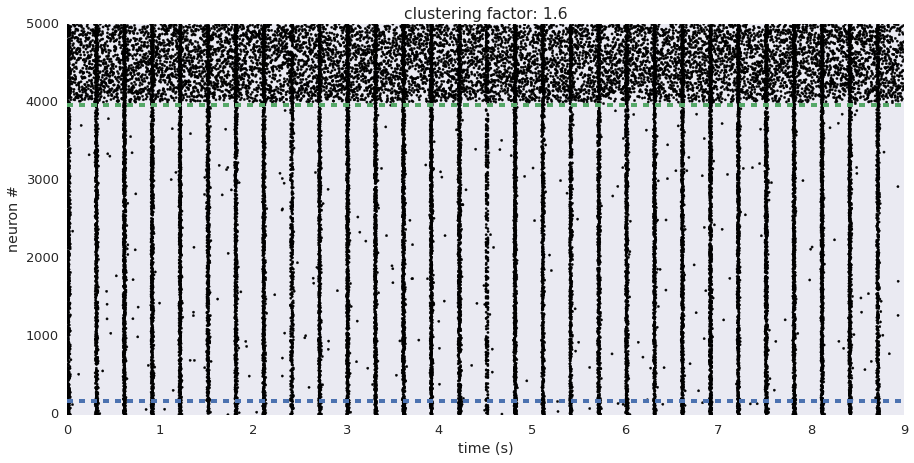

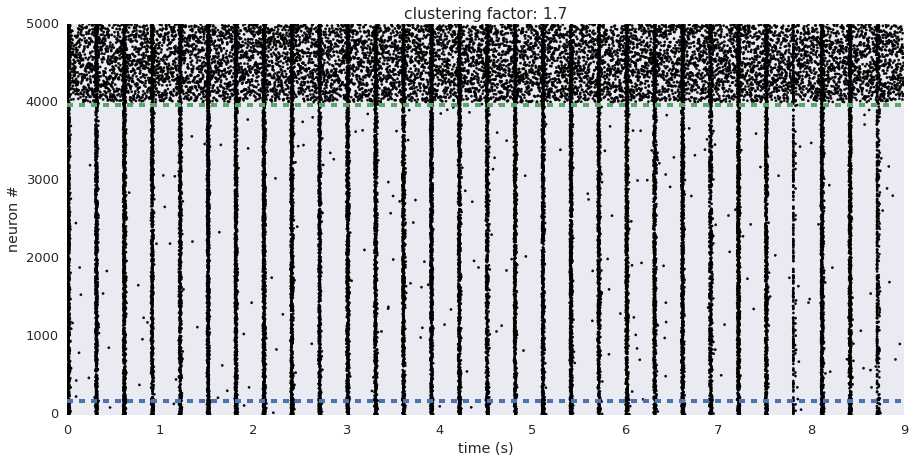

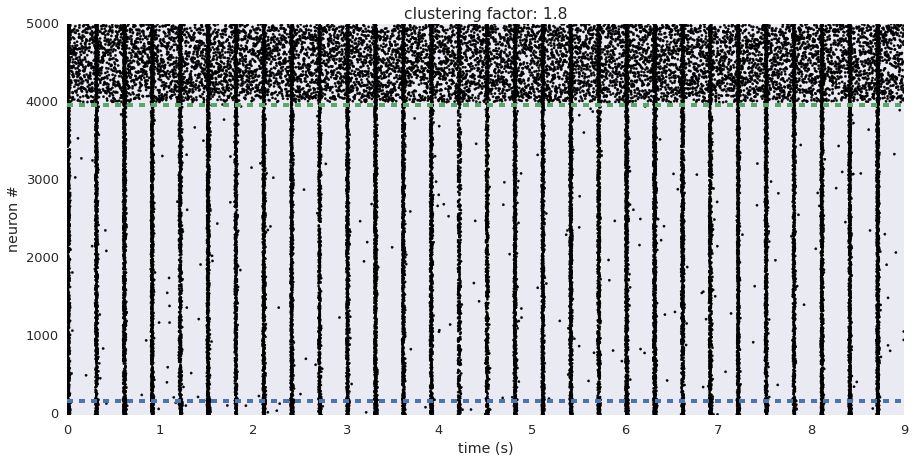

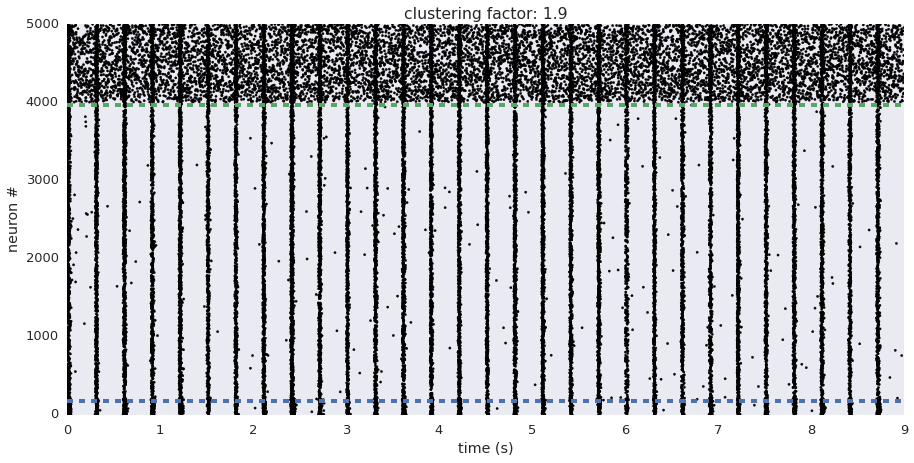

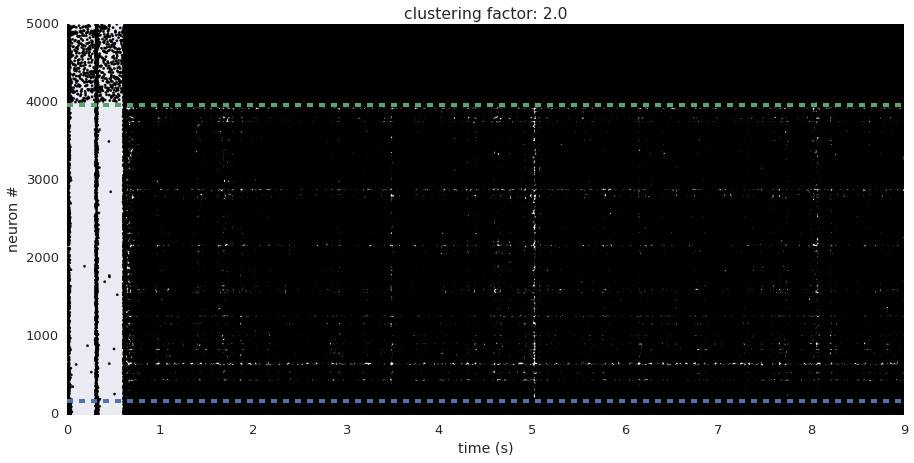

In [230]:
i = 10
j = 3
for k in xrange(5,11):
    results = np.load('result-{}-{}-{}.npz'.format(i,j,k))
    times, ids = results['spike_times_pre'], results['spike_ids_pre']
    idx = np.where(times<9.0)
    times, ids = times[idx], ids[idx]
    plt.figure(figsize=(15,7))
    utils.plotSpikes(times, ids, lines=inds[1:-1])
    plt.title('clustering factor: {}'.format(params['values'][2][k]))

In [4]:
print ordering['params']
print ordering['values']

[[u'stimulus', u'input_factor'] [u'stimulus', u'jitter', u'peak']
 [u'connectivity', u'Wcc_factor']]
[[  0.    0.1   0.2   0.3   0.4   0.5   0.6   0.7   0.8   0.9   1. ]
 [  0.    5.   10.   15.   20.   25.   30.   35.   40.   45.   50. ]
 [  1.    1.1   1.2   1.3   1.4   1.5   1.6   1.7   1.8   1.9   2. ]]


In [7]:
from scipy.signal import fftconvolve

In [27]:
i = 5
k = 7
inds_init = [0, 200, 4000, 5000]
dt = 0.0001
duration = 20

sigma = 20
L = 7*sigma
t = np.arange(-L/2, L/2, 1000*dt)
ker = np.exp(-0.5*np.square(t/sigma))
ker = ker/np.sum(ker)

rates = []

for j in xrange(sizes[1]):
    results = np.load('result-{}-{}-{}.npz'.format(i, j, k))
    
    times = results['spike_times_pre']
    ids = results['spike_ids_pre']
    
    # get only inhibitory neurons
    inds = np.where(ids>inds_init[-2])[0]
    times = times[inds]
    spike_train = np.zeros(np.ceil(duration/dt))
    
    for t in times:
        spike_train[int(t/dt)] += 1
    
    rates.append(fftconvolve(spike_train, ker, "same"))

In [50]:
max_rates = [np.max(r) for r in rates]

In [56]:
sns.set_style('darkgrid')

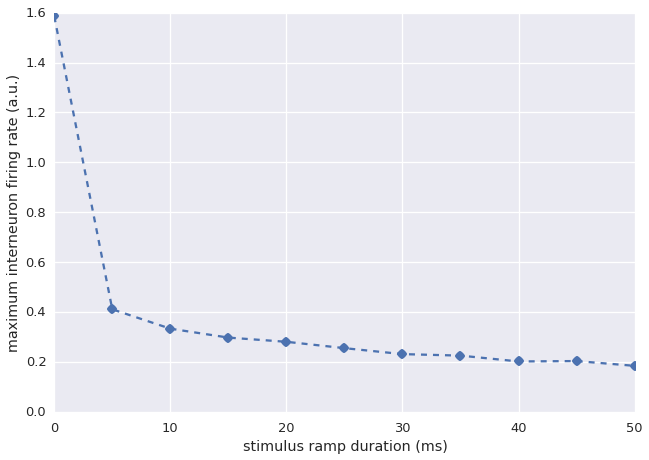

In [59]:
plt.plot(ordering['values'][1], max_rates, 'o--')
plt.ylabel('maximum interneuron firing rate (a.u.)')
plt.xlabel('stimulus ramp duration (ms)');